# Import Libraries

In [1]:
import numpy as np
import torch

from visualization import *
from main import *
from used_attacks import regression_PGD

''' Settings and seeds '''

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("device:", device)

if device == 'cuda': 
    print(torch.cuda.get_device_name()) 
    
''' test dataset '''

x = np.linspace(0, np.pi, 256)

x_test = x.reshape(x.shape[0],1)
print("test dataset:", x_test.shape, '\n')

''' model '''

layers = np.array([1,20,20,20,20,20,20,20,20,1]) #8 hidden layers
PINN = sequential_model(layers, device)
PINN.to(device)
print(PINN)

device: cpu
test dataset: (256, 1) 

sequential_model(
  (activation): Tanh()
  (loss_function): MSELoss()
  (linears): ModuleList(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): Linear(in_features=20, out_features=20, bias=True)
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): Linear(in_features=20, out_features=20, bias=True)
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [2]:
def generate_attack_samples(model, device, x_train, N0, n_samples=200, \
    lb=[0], ub=[np.pi], steps=2, eps=2e-1, eta=2e-2, m=0):
    
    attack = regression_PGD(model, lb=lb, ub=ub, steps=steps, eps=eps, eta=eta)
    x_adv = attack.attack(x_train).cpu().detach().numpy()
    
    if x_adv.shape[0] > N0 + (m+1)*n_samples:
        x_adv = np.vstack([x_adv[:N0,:] ,x_adv[-(m+1)*n_samples:,:]])

    f_adv_pred = np.abs(model.function(x_adv).squeeze().cpu().detach().numpy())
    index = np.argsort(f_adv_pred)[::-1][:n_samples]
    x_adv = x_adv[index,:]
    f_adv_pred = f_adv_pred[index]
    
    plot_samples(x_adv, f_adv_pred)
    
    return x_adv


def retrain(model, x_train, x_adv, x_boundary, u_boundary, x_test, epoch=1e5):
    
    x_train_temp = np.vstack([x_train, x_adv])
    
    f_test_pred = np.abs(model.function(x_test).squeeze().cpu().detach().numpy())
    plot_u(x_test, f_test_pred, title="test $r(x;theta)$", ylim=[-1,3])
    print('Test residual MSE: %.5f'  % (np.mean(np.square(f_test_pred))))

    model.iter = 0
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    model.train_model_adam(optimizer, x_boundary, u_boundary, x_train_temp, epoch)
    
    u_pred = model(x_test).squeeze().cpu().detach().numpy()
    
    plot_u(x_test, u_pred)

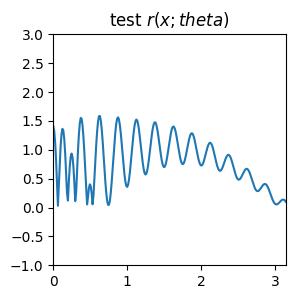

Test residual MSE: 0.79493
1000 tensor(0.4664, grad_fn=<AddBackward0>)
2000 tensor(0.4661, grad_fn=<AddBackward0>)
3000 tensor(0.4661, grad_fn=<AddBackward0>)
4000 tensor(0.4661, grad_fn=<AddBackward0>)
5000 tensor(0.4661, grad_fn=<AddBackward0>)
6000 tensor(0.4661, grad_fn=<AddBackward0>)
7000 tensor(0.4661, grad_fn=<AddBackward0>)
8000 tensor(0.4661, grad_fn=<AddBackward0>)
9000 tensor(0.4661, grad_fn=<AddBackward0>)
10000 tensor(0.4661, grad_fn=<AddBackward0>)


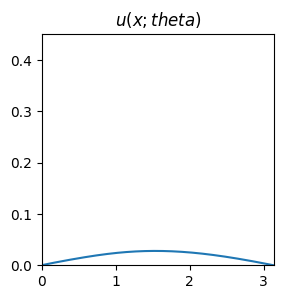

In [3]:
''' k=0 '''
N0 = 200
x_train, x_boundary, u_boundary = training_data_latin_hypercube(x, N_inner=N0)
retrain(PINN, x_train, np.array([]).reshape((0,1)), x_boundary, u_boundary, x_test, epoch=1e4)

k= 0


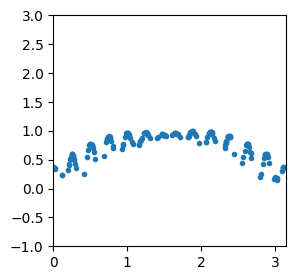

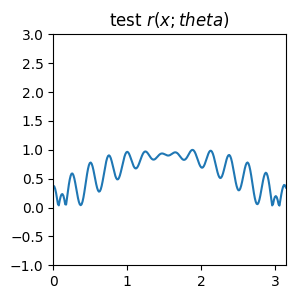

Test residual MSE: 0.46408
1000 tensor(0.4824, grad_fn=<AddBackward0>)
2000 tensor(0.4813, grad_fn=<AddBackward0>)
3000 tensor(0.4809, grad_fn=<AddBackward0>)
4000 tensor(0.4800, grad_fn=<AddBackward0>)
5000 tensor(0.4792, grad_fn=<AddBackward0>)
6000 tensor(0.4791, grad_fn=<AddBackward0>)
7000 tensor(0.4791, grad_fn=<AddBackward0>)
8000 tensor(0.4797, grad_fn=<AddBackward0>)
9000 tensor(0.4790, grad_fn=<AddBackward0>)
10000 tensor(0.4790, grad_fn=<AddBackward0>)
11000 tensor(0.4790, grad_fn=<AddBackward0>)
12000 tensor(0.4790, grad_fn=<AddBackward0>)
13000 tensor(0.4789, grad_fn=<AddBackward0>)
14000 tensor(0.4789, grad_fn=<AddBackward0>)
15000 tensor(0.4789, grad_fn=<AddBackward0>)
16000 tensor(0.4789, grad_fn=<AddBackward0>)
17000 tensor(0.4788, grad_fn=<AddBackward0>)
18000 tensor(0.4788, grad_fn=<AddBackward0>)
19000 tensor(0.4788, grad_fn=<AddBackward0>)
20000 tensor(0.4787, grad_fn=<AddBackward0>)


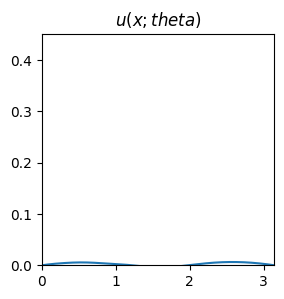

k= 1


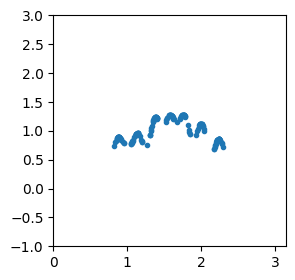

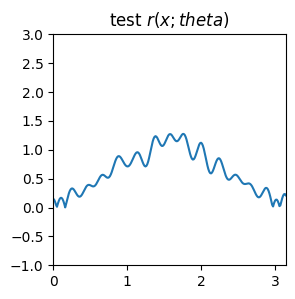

Test residual MSE: 0.51792
1000 tensor(0.5365, grad_fn=<AddBackward0>)
2000 tensor(0.5360, grad_fn=<AddBackward0>)
3000 tensor(0.5359, grad_fn=<AddBackward0>)
4000 tensor(0.5358, grad_fn=<AddBackward0>)
5000 tensor(0.5358, grad_fn=<AddBackward0>)
6000 tensor(0.5357, grad_fn=<AddBackward0>)
7000 tensor(0.5357, grad_fn=<AddBackward0>)
8000 tensor(0.5357, grad_fn=<AddBackward0>)
9000 tensor(0.5352, grad_fn=<AddBackward0>)
10000 tensor(0.5339, grad_fn=<AddBackward0>)
11000 tensor(0.5329, grad_fn=<AddBackward0>)
12000 tensor(0.5318, grad_fn=<AddBackward0>)
13000 tensor(0.5314, grad_fn=<AddBackward0>)
14000 tensor(0.5313, grad_fn=<AddBackward0>)
15000 tensor(0.5313, grad_fn=<AddBackward0>)
16000 tensor(0.5320, grad_fn=<AddBackward0>)
17000 tensor(0.5313, grad_fn=<AddBackward0>)
18000 tensor(0.5312, grad_fn=<AddBackward0>)
19000 tensor(0.5311, grad_fn=<AddBackward0>)
20000 tensor(0.5311, grad_fn=<AddBackward0>)


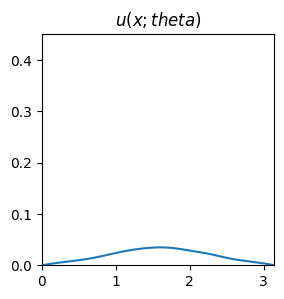

k= 2


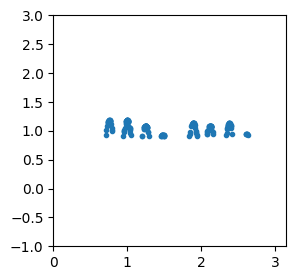

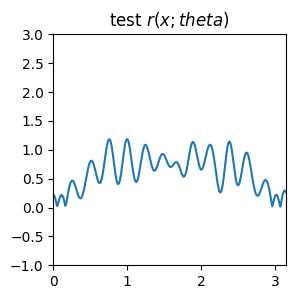

Test residual MSE: 0.48045
1000 tensor(0.6066, grad_fn=<AddBackward0>)
2000 tensor(0.6062, grad_fn=<AddBackward0>)
3000 tensor(0.6060, grad_fn=<AddBackward0>)
4000 tensor(0.6059, grad_fn=<AddBackward0>)
5000 tensor(0.6057, grad_fn=<AddBackward0>)
6000 tensor(0.6051, grad_fn=<AddBackward0>)
7000 tensor(0.6025, grad_fn=<AddBackward0>)
8000 tensor(0.5723, grad_fn=<AddBackward0>)
9000 tensor(0.5131, grad_fn=<AddBackward0>)
10000 tensor(0.5054, grad_fn=<AddBackward0>)
11000 tensor(0.4939, grad_fn=<AddBackward0>)
12000 tensor(0.4557, grad_fn=<AddBackward0>)
13000 tensor(0.4048, grad_fn=<AddBackward0>)
14000 tensor(0.3832, grad_fn=<AddBackward0>)
15000 tensor(0.3662, grad_fn=<AddBackward0>)
16000 tensor(0.3354, grad_fn=<AddBackward0>)
17000 tensor(0.2968, grad_fn=<AddBackward0>)
18000 tensor(0.2883, grad_fn=<AddBackward0>)
19000 tensor(0.2834, grad_fn=<AddBackward0>)
20000 tensor(0.2808, grad_fn=<AddBackward0>)


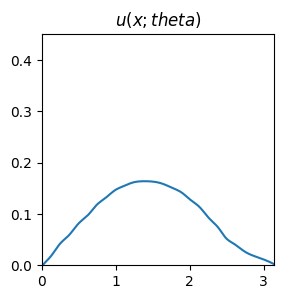

k= 3


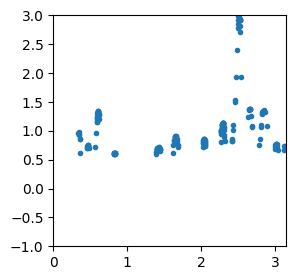

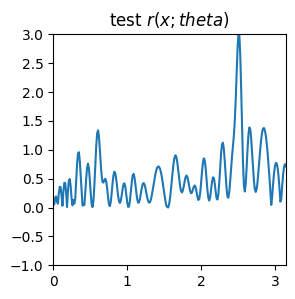

Test residual MSE: 0.51057
1000 tensor(0.3958, grad_fn=<AddBackward0>)
2000 tensor(0.3881, grad_fn=<AddBackward0>)
3000 tensor(0.3817, grad_fn=<AddBackward0>)
4000 tensor(0.3775, grad_fn=<AddBackward0>)
5000 tensor(0.3377, grad_fn=<AddBackward0>)
6000 tensor(0.3208, grad_fn=<AddBackward0>)
7000 tensor(0.2985, grad_fn=<AddBackward0>)
8000 tensor(0.2727, grad_fn=<AddBackward0>)
9000 tensor(0.2587, grad_fn=<AddBackward0>)
10000 tensor(0.2514, grad_fn=<AddBackward0>)
11000 tensor(0.2462, grad_fn=<AddBackward0>)
12000 tensor(0.2385, grad_fn=<AddBackward0>)
13000 tensor(0.2255, grad_fn=<AddBackward0>)
14000 tensor(0.1776, grad_fn=<AddBackward0>)
15000 tensor(0.0856, grad_fn=<AddBackward0>)
16000 tensor(0.0703, grad_fn=<AddBackward0>)
17000 tensor(0.0689, grad_fn=<AddBackward0>)
18000 tensor(0.0677, grad_fn=<AddBackward0>)
19000 tensor(0.0649, grad_fn=<AddBackward0>)
20000 tensor(0.0633, grad_fn=<AddBackward0>)


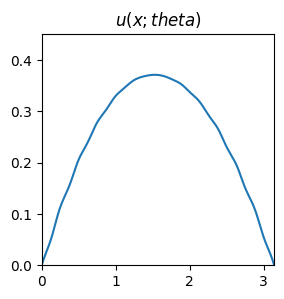

k= 4


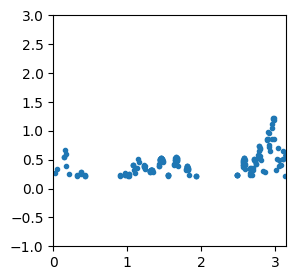

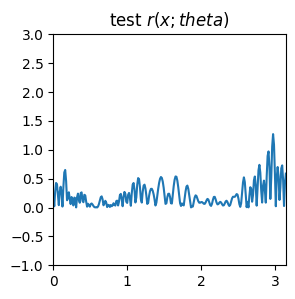

Test residual MSE: 0.09258
1000 tensor(0.0875, grad_fn=<AddBackward0>)
2000 tensor(0.0851, grad_fn=<AddBackward0>)
3000 tensor(0.0818, grad_fn=<AddBackward0>)
4000 tensor(0.0776, grad_fn=<AddBackward0>)
5000 tensor(0.0756, grad_fn=<AddBackward0>)
6000 tensor(0.0659, grad_fn=<AddBackward0>)
7000 tensor(0.0611, grad_fn=<AddBackward0>)
8000 tensor(0.0570, grad_fn=<AddBackward0>)
9000 tensor(0.0542, grad_fn=<AddBackward0>)
10000 tensor(0.0523, grad_fn=<AddBackward0>)
11000 tensor(0.0528, grad_fn=<AddBackward0>)
12000 tensor(0.0496, grad_fn=<AddBackward0>)
13000 tensor(0.0485, grad_fn=<AddBackward0>)
14000 tensor(0.0474, grad_fn=<AddBackward0>)
15000 tensor(0.0460, grad_fn=<AddBackward0>)
16000 tensor(0.0441, grad_fn=<AddBackward0>)
17000 tensor(0.0418, grad_fn=<AddBackward0>)
18000 tensor(0.0403, grad_fn=<AddBackward0>)
19000 tensor(0.0368, grad_fn=<AddBackward0>)
20000 tensor(0.0439, grad_fn=<AddBackward0>)


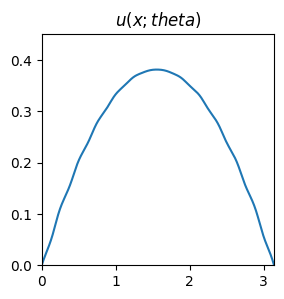

k= 5


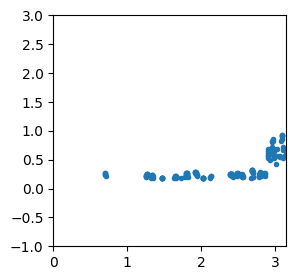

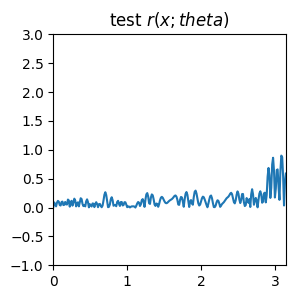

Test residual MSE: 0.04219
1000 tensor(0.0453, grad_fn=<AddBackward0>)
2000 tensor(0.0460, grad_fn=<AddBackward0>)
3000 tensor(0.0389, grad_fn=<AddBackward0>)
4000 tensor(0.0382, grad_fn=<AddBackward0>)
5000 tensor(0.0344, grad_fn=<AddBackward0>)
6000 tensor(0.0330, grad_fn=<AddBackward0>)
7000 tensor(0.0312, grad_fn=<AddBackward0>)
8000 tensor(0.0298, grad_fn=<AddBackward0>)
9000 tensor(0.0288, grad_fn=<AddBackward0>)
10000 tensor(0.0268, grad_fn=<AddBackward0>)
11000 tensor(0.0254, grad_fn=<AddBackward0>)
12000 tensor(0.0237, grad_fn=<AddBackward0>)
13000 tensor(0.0221, grad_fn=<AddBackward0>)
14000 tensor(0.0204, grad_fn=<AddBackward0>)
15000 tensor(0.0185, grad_fn=<AddBackward0>)
16000 tensor(0.0162, grad_fn=<AddBackward0>)
17000 tensor(0.0134, grad_fn=<AddBackward0>)
18000 tensor(0.0103, grad_fn=<AddBackward0>)
19000 tensor(0.0081, grad_fn=<AddBackward0>)
20000 tensor(0.0071, grad_fn=<AddBackward0>)


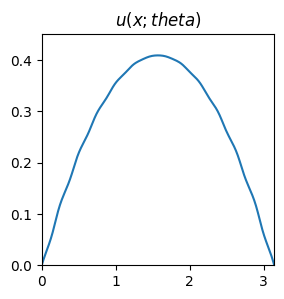

k= 6


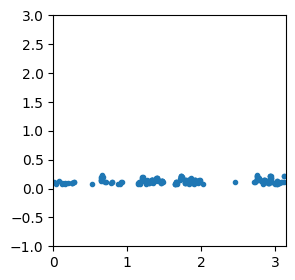

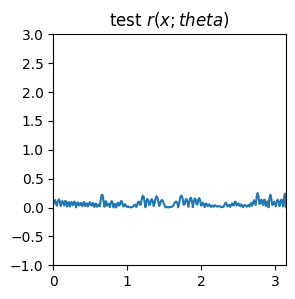

Test residual MSE: 0.00787
1000 tensor(0.0103, grad_fn=<AddBackward0>)
2000 tensor(0.0078, grad_fn=<AddBackward0>)
3000 tensor(0.0162, grad_fn=<AddBackward0>)
4000 tensor(0.0081, grad_fn=<AddBackward0>)
5000 tensor(0.0071, grad_fn=<AddBackward0>)
6000 tensor(0.0070, grad_fn=<AddBackward0>)
7000 tensor(0.0069, grad_fn=<AddBackward0>)
8000 tensor(0.0068, grad_fn=<AddBackward0>)
9000 tensor(0.0068, grad_fn=<AddBackward0>)
10000 tensor(0.0067, grad_fn=<AddBackward0>)
11000 tensor(0.0065, grad_fn=<AddBackward0>)
12000 tensor(0.0064, grad_fn=<AddBackward0>)
13000 tensor(0.0067, grad_fn=<AddBackward0>)
14000 tensor(0.0062, grad_fn=<AddBackward0>)
15000 tensor(0.0064, grad_fn=<AddBackward0>)
16000 tensor(0.0061, grad_fn=<AddBackward0>)
17000 tensor(0.0087, grad_fn=<AddBackward0>)
18000 tensor(0.0059, grad_fn=<AddBackward0>)
19000 tensor(0.0064, grad_fn=<AddBackward0>)
20000 tensor(0.0058, grad_fn=<AddBackward0>)


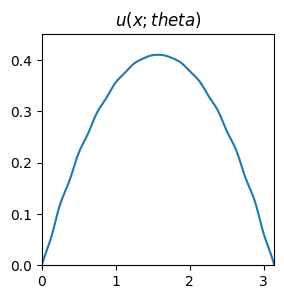

k= 7


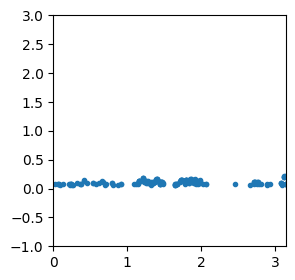

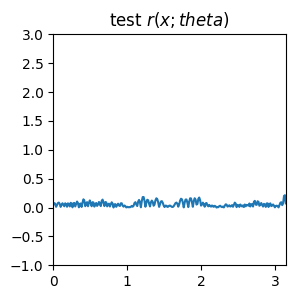

Test residual MSE: 0.00520
1000 tensor(0.0065, grad_fn=<AddBackward0>)
2000 tensor(0.0064, grad_fn=<AddBackward0>)
3000 tensor(0.0065, grad_fn=<AddBackward0>)
4000 tensor(0.0065, grad_fn=<AddBackward0>)
5000 tensor(0.0068, grad_fn=<AddBackward0>)
6000 tensor(0.0061, grad_fn=<AddBackward0>)
7000 tensor(0.0061, grad_fn=<AddBackward0>)
8000 tensor(0.0059, grad_fn=<AddBackward0>)
9000 tensor(0.0058, grad_fn=<AddBackward0>)
10000 tensor(0.0060, grad_fn=<AddBackward0>)
11000 tensor(0.0059, grad_fn=<AddBackward0>)
12000 tensor(0.0056, grad_fn=<AddBackward0>)
13000 tensor(0.0056, grad_fn=<AddBackward0>)
14000 tensor(0.0075, grad_fn=<AddBackward0>)
15000 tensor(0.0055, grad_fn=<AddBackward0>)
16000 tensor(0.0056, grad_fn=<AddBackward0>)
17000 tensor(0.0053, grad_fn=<AddBackward0>)
18000 tensor(0.0052, grad_fn=<AddBackward0>)
19000 tensor(0.0053, grad_fn=<AddBackward0>)
20000 tensor(0.0051, grad_fn=<AddBackward0>)


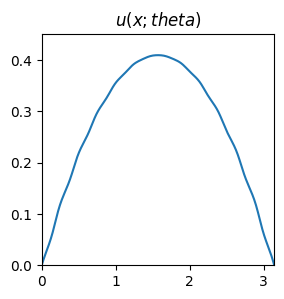

k= 8


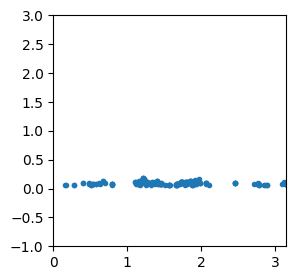

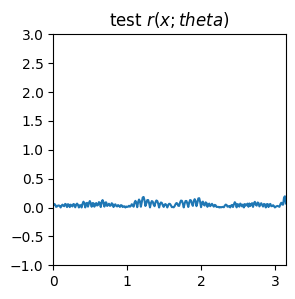

Test residual MSE: 0.00420
1000 tensor(0.0055, grad_fn=<AddBackward0>)
2000 tensor(0.0055, grad_fn=<AddBackward0>)
3000 tensor(0.0056, grad_fn=<AddBackward0>)
4000 tensor(0.0054, grad_fn=<AddBackward0>)
5000 tensor(0.0054, grad_fn=<AddBackward0>)
6000 tensor(0.0052, grad_fn=<AddBackward0>)
7000 tensor(0.0055, grad_fn=<AddBackward0>)
8000 tensor(0.0051, grad_fn=<AddBackward0>)
9000 tensor(0.0109, grad_fn=<AddBackward0>)
10000 tensor(0.0051, grad_fn=<AddBackward0>)
11000 tensor(0.0049, grad_fn=<AddBackward0>)
12000 tensor(0.0050, grad_fn=<AddBackward0>)
13000 tensor(0.0048, grad_fn=<AddBackward0>)
14000 tensor(0.0048, grad_fn=<AddBackward0>)
15000 tensor(0.0051, grad_fn=<AddBackward0>)
16000 tensor(0.0051, grad_fn=<AddBackward0>)
17000 tensor(0.0046, grad_fn=<AddBackward0>)
18000 tensor(0.0048, grad_fn=<AddBackward0>)
19000 tensor(0.0045, grad_fn=<AddBackward0>)
20000 tensor(0.0044, grad_fn=<AddBackward0>)


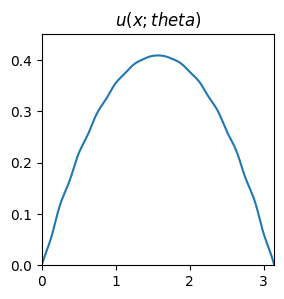

k= 9


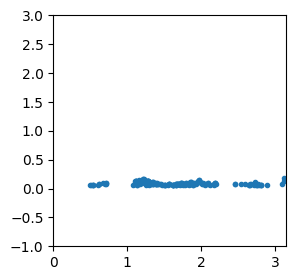

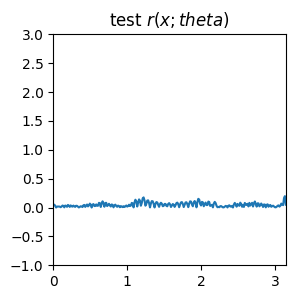

Test residual MSE: 0.00352
1000 tensor(0.0048, grad_fn=<AddBackward0>)
2000 tensor(0.0047, grad_fn=<AddBackward0>)
3000 tensor(0.0047, grad_fn=<AddBackward0>)
4000 tensor(0.0047, grad_fn=<AddBackward0>)
5000 tensor(0.0050, grad_fn=<AddBackward0>)
6000 tensor(0.0045, grad_fn=<AddBackward0>)
7000 tensor(0.0066, grad_fn=<AddBackward0>)
8000 tensor(0.0044, grad_fn=<AddBackward0>)
9000 tensor(0.0044, grad_fn=<AddBackward0>)
10000 tensor(0.0045, grad_fn=<AddBackward0>)
11000 tensor(0.0043, grad_fn=<AddBackward0>)
12000 tensor(0.0042, grad_fn=<AddBackward0>)
13000 tensor(0.0042, grad_fn=<AddBackward0>)
14000 tensor(0.0042, grad_fn=<AddBackward0>)
15000 tensor(0.0041, grad_fn=<AddBackward0>)
16000 tensor(0.0041, grad_fn=<AddBackward0>)
17000 tensor(0.0040, grad_fn=<AddBackward0>)
18000 tensor(0.0040, grad_fn=<AddBackward0>)
19000 tensor(0.0041, grad_fn=<AddBackward0>)
20000 tensor(0.0072, grad_fn=<AddBackward0>)


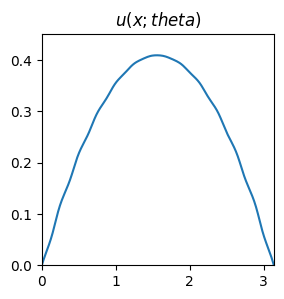

k= 10


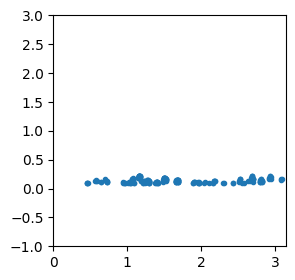

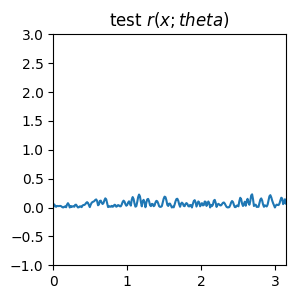

Test residual MSE: 0.00699
1000 tensor(0.0040, grad_fn=<AddBackward0>)
2000 tensor(0.0040, grad_fn=<AddBackward0>)
3000 tensor(0.0040, grad_fn=<AddBackward0>)
4000 tensor(0.0040, grad_fn=<AddBackward0>)
5000 tensor(0.0053, grad_fn=<AddBackward0>)
6000 tensor(0.0043, grad_fn=<AddBackward0>)
7000 tensor(0.0040, grad_fn=<AddBackward0>)
8000 tensor(0.0038, grad_fn=<AddBackward0>)
9000 tensor(0.0038, grad_fn=<AddBackward0>)
10000 tensor(0.0038, grad_fn=<AddBackward0>)
11000 tensor(0.0051, grad_fn=<AddBackward0>)
12000 tensor(0.0037, grad_fn=<AddBackward0>)
13000 tensor(0.0037, grad_fn=<AddBackward0>)
14000 tensor(0.0048, grad_fn=<AddBackward0>)
15000 tensor(0.0036, grad_fn=<AddBackward0>)
16000 tensor(0.0041, grad_fn=<AddBackward0>)
17000 tensor(0.0036, grad_fn=<AddBackward0>)
18000 tensor(0.0036, grad_fn=<AddBackward0>)
19000 tensor(0.0035, grad_fn=<AddBackward0>)
20000 tensor(0.0035, grad_fn=<AddBackward0>)


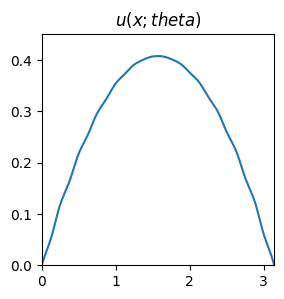

k= 11


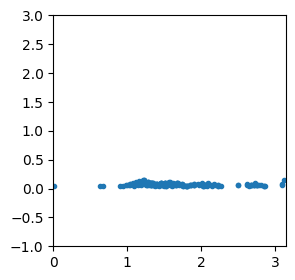

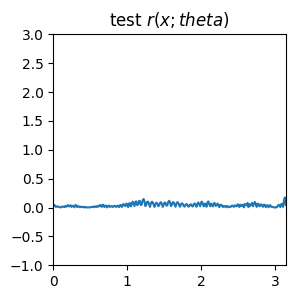

Test residual MSE: 0.00260
1000 tensor(0.0039, grad_fn=<AddBackward0>)
2000 tensor(0.0037, grad_fn=<AddBackward0>)
3000 tensor(0.0037, grad_fn=<AddBackward0>)
4000 tensor(0.0038, grad_fn=<AddBackward0>)
5000 tensor(0.0036, grad_fn=<AddBackward0>)
6000 tensor(0.0153, grad_fn=<AddBackward0>)
7000 tensor(0.0039, grad_fn=<AddBackward0>)
8000 tensor(0.0041, grad_fn=<AddBackward0>)
9000 tensor(0.0037, grad_fn=<AddBackward0>)
10000 tensor(0.0035, grad_fn=<AddBackward0>)
11000 tensor(0.0121, grad_fn=<AddBackward0>)
12000 tensor(0.0035, grad_fn=<AddBackward0>)
13000 tensor(0.0045, grad_fn=<AddBackward0>)
14000 tensor(0.0034, grad_fn=<AddBackward0>)
15000 tensor(0.0048, grad_fn=<AddBackward0>)
16000 tensor(0.0037, grad_fn=<AddBackward0>)
17000 tensor(0.0034, grad_fn=<AddBackward0>)
18000 tensor(0.0050, grad_fn=<AddBackward0>)
19000 tensor(0.0033, grad_fn=<AddBackward0>)
20000 tensor(0.0034, grad_fn=<AddBackward0>)


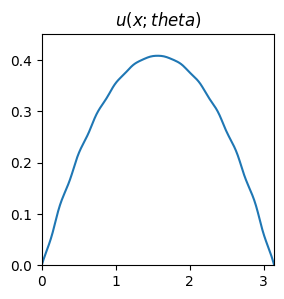

k= 12


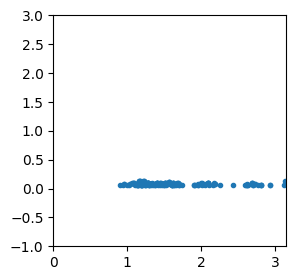

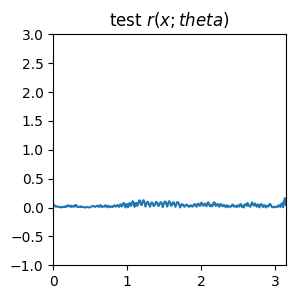

Test residual MSE: 0.00242
1000 tensor(0.0035, grad_fn=<AddBackward0>)
2000 tensor(0.0040, grad_fn=<AddBackward0>)
3000 tensor(0.0039, grad_fn=<AddBackward0>)
4000 tensor(0.0035, grad_fn=<AddBackward0>)
5000 tensor(0.0066, grad_fn=<AddBackward0>)
6000 tensor(0.0035, grad_fn=<AddBackward0>)
7000 tensor(0.0034, grad_fn=<AddBackward0>)
8000 tensor(0.0034, grad_fn=<AddBackward0>)
9000 tensor(0.0089, grad_fn=<AddBackward0>)
10000 tensor(0.0036, grad_fn=<AddBackward0>)
11000 tensor(0.0034, grad_fn=<AddBackward0>)
12000 tensor(0.0036, grad_fn=<AddBackward0>)
13000 tensor(0.0034, grad_fn=<AddBackward0>)
14000 tensor(0.0033, grad_fn=<AddBackward0>)
15000 tensor(0.0059, grad_fn=<AddBackward0>)
16000 tensor(0.0033, grad_fn=<AddBackward0>)
17000 tensor(0.0032, grad_fn=<AddBackward0>)
18000 tensor(0.0036, grad_fn=<AddBackward0>)
19000 tensor(0.0034, grad_fn=<AddBackward0>)
20000 tensor(0.0032, grad_fn=<AddBackward0>)


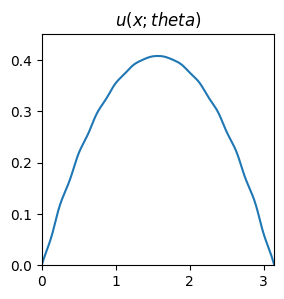

k= 13


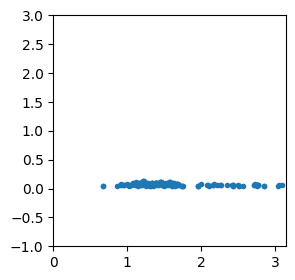

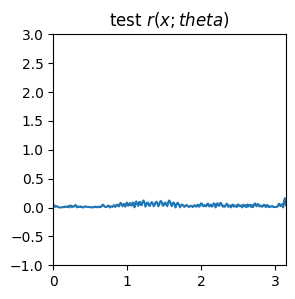

Test residual MSE: 0.00218
1000 tensor(0.0034, grad_fn=<AddBackward0>)
2000 tensor(0.0034, grad_fn=<AddBackward0>)
3000 tensor(0.0035, grad_fn=<AddBackward0>)
4000 tensor(0.0034, grad_fn=<AddBackward0>)
5000 tensor(0.0040, grad_fn=<AddBackward0>)
6000 tensor(0.0035, grad_fn=<AddBackward0>)
7000 tensor(0.0038, grad_fn=<AddBackward0>)
8000 tensor(0.0044, grad_fn=<AddBackward0>)
9000 tensor(0.0033, grad_fn=<AddBackward0>)
10000 tensor(0.0033, grad_fn=<AddBackward0>)
11000 tensor(0.0032, grad_fn=<AddBackward0>)
12000 tensor(0.0032, grad_fn=<AddBackward0>)
13000 tensor(0.0038, grad_fn=<AddBackward0>)
14000 tensor(0.0032, grad_fn=<AddBackward0>)
15000 tensor(0.0032, grad_fn=<AddBackward0>)
16000 tensor(0.0032, grad_fn=<AddBackward0>)
17000 tensor(0.0031, grad_fn=<AddBackward0>)
18000 tensor(0.0032, grad_fn=<AddBackward0>)
19000 tensor(0.0031, grad_fn=<AddBackward0>)
20000 tensor(0.0031, grad_fn=<AddBackward0>)


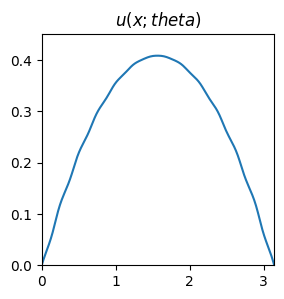

k= 14


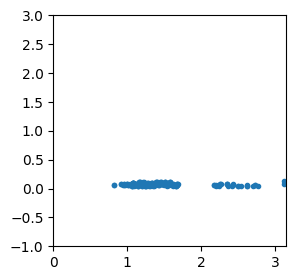

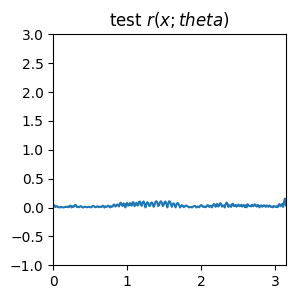

Test residual MSE: 0.00197
1000 tensor(0.0033, grad_fn=<AddBackward0>)
2000 tensor(0.0032, grad_fn=<AddBackward0>)
3000 tensor(0.0034, grad_fn=<AddBackward0>)
4000 tensor(0.0064, grad_fn=<AddBackward0>)
5000 tensor(0.0127, grad_fn=<AddBackward0>)
6000 tensor(0.0032, grad_fn=<AddBackward0>)
7000 tensor(0.0050, grad_fn=<AddBackward0>)
8000 tensor(0.0038, grad_fn=<AddBackward0>)
9000 tensor(0.0049, grad_fn=<AddBackward0>)
10000 tensor(0.0032, grad_fn=<AddBackward0>)
11000 tensor(0.0031, grad_fn=<AddBackward0>)
12000 tensor(0.0031, grad_fn=<AddBackward0>)
13000 tensor(0.0031, grad_fn=<AddBackward0>)
14000 tensor(0.0031, grad_fn=<AddBackward0>)
15000 tensor(0.0031, grad_fn=<AddBackward0>)
16000 tensor(0.0043, grad_fn=<AddBackward0>)
17000 tensor(0.0031, grad_fn=<AddBackward0>)
18000 tensor(0.0044, grad_fn=<AddBackward0>)
19000 tensor(0.0039, grad_fn=<AddBackward0>)
20000 tensor(0.0031, grad_fn=<AddBackward0>)


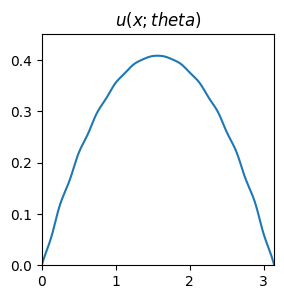

k= 15


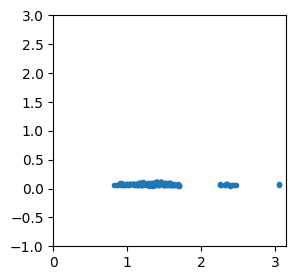

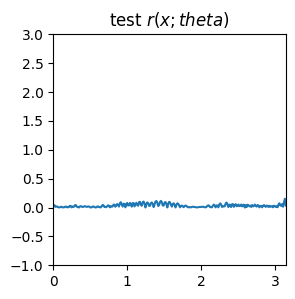

Test residual MSE: 0.00186
1000 tensor(0.0033, grad_fn=<AddBackward0>)
2000 tensor(0.0033, grad_fn=<AddBackward0>)
3000 tensor(0.0032, grad_fn=<AddBackward0>)
4000 tensor(0.0050, grad_fn=<AddBackward0>)
5000 tensor(0.0032, grad_fn=<AddBackward0>)
6000 tensor(0.0032, grad_fn=<AddBackward0>)
7000 tensor(0.0039, grad_fn=<AddBackward0>)
8000 tensor(0.0032, grad_fn=<AddBackward0>)
9000 tensor(0.0032, grad_fn=<AddBackward0>)
10000 tensor(0.0032, grad_fn=<AddBackward0>)
11000 tensor(0.0032, grad_fn=<AddBackward0>)
12000 tensor(0.0032, grad_fn=<AddBackward0>)
13000 tensor(0.0032, grad_fn=<AddBackward0>)
14000 tensor(0.0032, grad_fn=<AddBackward0>)
15000 tensor(0.0032, grad_fn=<AddBackward0>)
16000 tensor(0.0033, grad_fn=<AddBackward0>)
17000 tensor(0.0033, grad_fn=<AddBackward0>)
18000 tensor(0.0033, grad_fn=<AddBackward0>)
19000 tensor(0.0033, grad_fn=<AddBackward0>)
20000 tensor(0.0031, grad_fn=<AddBackward0>)


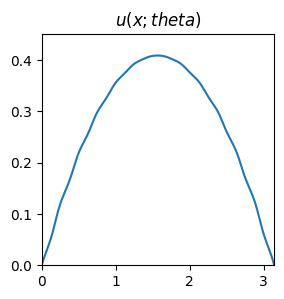

k= 16


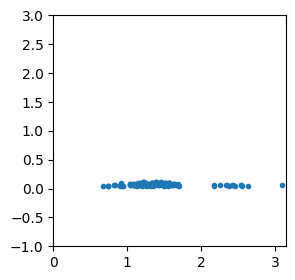

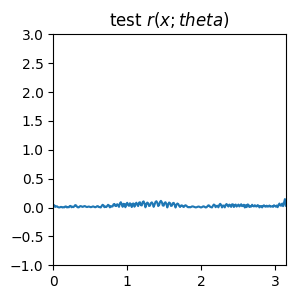

Test residual MSE: 0.00178
1000 tensor(0.0033, grad_fn=<AddBackward0>)
2000 tensor(0.0033, grad_fn=<AddBackward0>)
3000 tensor(0.0033, grad_fn=<AddBackward0>)
4000 tensor(0.0033, grad_fn=<AddBackward0>)
5000 tensor(0.0033, grad_fn=<AddBackward0>)
6000 tensor(0.0033, grad_fn=<AddBackward0>)
7000 tensor(0.0032, grad_fn=<AddBackward0>)
8000 tensor(0.0034, grad_fn=<AddBackward0>)
9000 tensor(0.0051, grad_fn=<AddBackward0>)
10000 tensor(0.0032, grad_fn=<AddBackward0>)
11000 tensor(0.0034, grad_fn=<AddBackward0>)
12000 tensor(0.0033, grad_fn=<AddBackward0>)
13000 tensor(0.0033, grad_fn=<AddBackward0>)
14000 tensor(0.0042, grad_fn=<AddBackward0>)
15000 tensor(0.0042, grad_fn=<AddBackward0>)
16000 tensor(0.0036, grad_fn=<AddBackward0>)
17000 tensor(0.0045, grad_fn=<AddBackward0>)
18000 tensor(0.0046, grad_fn=<AddBackward0>)
19000 tensor(0.0033, grad_fn=<AddBackward0>)
20000 tensor(0.0038, grad_fn=<AddBackward0>)


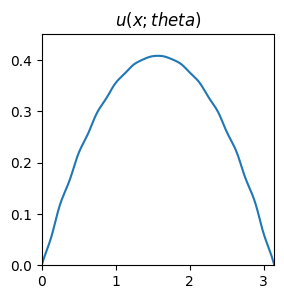

k= 17


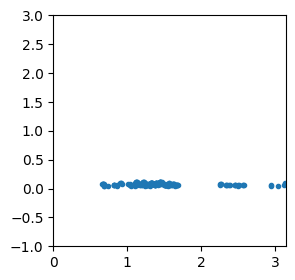

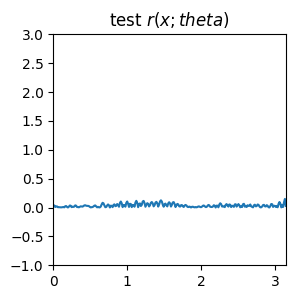

Test residual MSE: 0.00198
1000 tensor(0.0032, grad_fn=<AddBackward0>)
2000 tensor(0.0032, grad_fn=<AddBackward0>)
3000 tensor(0.0095, grad_fn=<AddBackward0>)
4000 tensor(0.0046, grad_fn=<AddBackward0>)
5000 tensor(0.0032, grad_fn=<AddBackward0>)
6000 tensor(0.0053, grad_fn=<AddBackward0>)
7000 tensor(0.0059, grad_fn=<AddBackward0>)
8000 tensor(0.0032, grad_fn=<AddBackward0>)
9000 tensor(0.0032, grad_fn=<AddBackward0>)
10000 tensor(0.0032, grad_fn=<AddBackward0>)
11000 tensor(0.0034, grad_fn=<AddBackward0>)
12000 tensor(0.0050, grad_fn=<AddBackward0>)
13000 tensor(0.0059, grad_fn=<AddBackward0>)
14000 tensor(0.0031, grad_fn=<AddBackward0>)
15000 tensor(0.0032, grad_fn=<AddBackward0>)
16000 tensor(0.0032, grad_fn=<AddBackward0>)
17000 tensor(0.0055, grad_fn=<AddBackward0>)
18000 tensor(0.0031, grad_fn=<AddBackward0>)
19000 tensor(0.0031, grad_fn=<AddBackward0>)
20000 tensor(0.0031, grad_fn=<AddBackward0>)


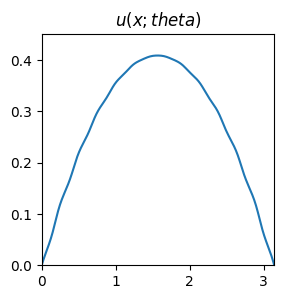

k= 18


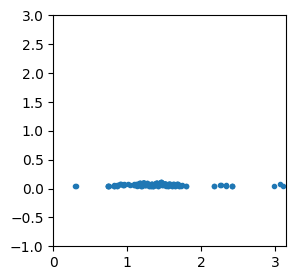

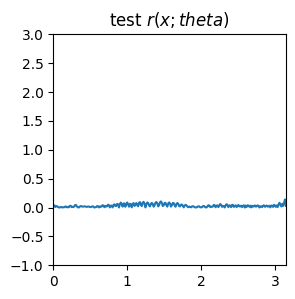

Test residual MSE: 0.00165
1000 tensor(0.0032, grad_fn=<AddBackward0>)
2000 tensor(0.0032, grad_fn=<AddBackward0>)
3000 tensor(0.0032, grad_fn=<AddBackward0>)
4000 tensor(0.0032, grad_fn=<AddBackward0>)
5000 tensor(0.0031, grad_fn=<AddBackward0>)
6000 tensor(0.0032, grad_fn=<AddBackward0>)
7000 tensor(0.0064, grad_fn=<AddBackward0>)
8000 tensor(0.0031, grad_fn=<AddBackward0>)
9000 tensor(0.0031, grad_fn=<AddBackward0>)
10000 tensor(0.0031, grad_fn=<AddBackward0>)
11000 tensor(0.0084, grad_fn=<AddBackward0>)
12000 tensor(0.0031, grad_fn=<AddBackward0>)
13000 tensor(0.0031, grad_fn=<AddBackward0>)
14000 tensor(0.0031, grad_fn=<AddBackward0>)
15000 tensor(0.0099, grad_fn=<AddBackward0>)
16000 tensor(0.0037, grad_fn=<AddBackward0>)
17000 tensor(0.0045, grad_fn=<AddBackward0>)
18000 tensor(0.0030, grad_fn=<AddBackward0>)
19000 tensor(0.0030, grad_fn=<AddBackward0>)
20000 tensor(0.0030, grad_fn=<AddBackward0>)


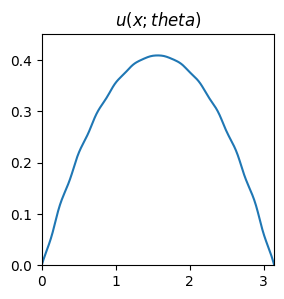

k= 19


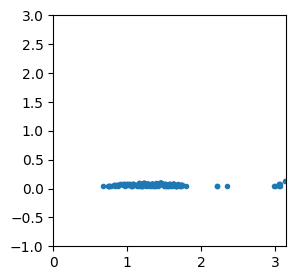

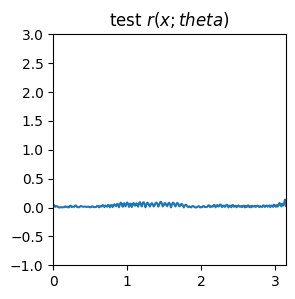

Test residual MSE: 0.00158
1000 tensor(0.0031, grad_fn=<AddBackward0>)
2000 tensor(0.0042, grad_fn=<AddBackward0>)
3000 tensor(0.0030, grad_fn=<AddBackward0>)
4000 tensor(0.0031, grad_fn=<AddBackward0>)
5000 tensor(0.0030, grad_fn=<AddBackward0>)
6000 tensor(0.0030, grad_fn=<AddBackward0>)
7000 tensor(0.0030, grad_fn=<AddBackward0>)
8000 tensor(0.0030, grad_fn=<AddBackward0>)
9000 tensor(0.0030, grad_fn=<AddBackward0>)
10000 tensor(0.0029, grad_fn=<AddBackward0>)
11000 tensor(0.0029, grad_fn=<AddBackward0>)
12000 tensor(0.0029, grad_fn=<AddBackward0>)
13000 tensor(0.0029, grad_fn=<AddBackward0>)
14000 tensor(0.0029, grad_fn=<AddBackward0>)
15000 tensor(0.0029, grad_fn=<AddBackward0>)
16000 tensor(0.0028, grad_fn=<AddBackward0>)
17000 tensor(0.0028, grad_fn=<AddBackward0>)
18000 tensor(0.0040, grad_fn=<AddBackward0>)
19000 tensor(0.0028, grad_fn=<AddBackward0>)
20000 tensor(0.0027, grad_fn=<AddBackward0>)


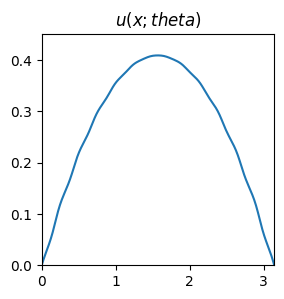

k= 20


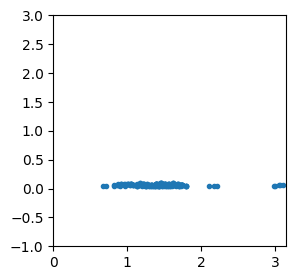

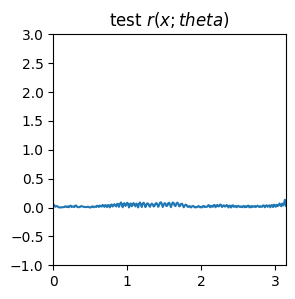

Test residual MSE: 0.00150
1000 tensor(0.0028, grad_fn=<AddBackward0>)
2000 tensor(0.0028, grad_fn=<AddBackward0>)
3000 tensor(0.0028, grad_fn=<AddBackward0>)
4000 tensor(0.0027, grad_fn=<AddBackward0>)
5000 tensor(0.0034, grad_fn=<AddBackward0>)
6000 tensor(0.0076, grad_fn=<AddBackward0>)
7000 tensor(0.0026, grad_fn=<AddBackward0>)
8000 tensor(0.0029, grad_fn=<AddBackward0>)
9000 tensor(0.0056, grad_fn=<AddBackward0>)
10000 tensor(0.0040, grad_fn=<AddBackward0>)
11000 tensor(0.0025, grad_fn=<AddBackward0>)
12000 tensor(0.0025, grad_fn=<AddBackward0>)
13000 tensor(0.0025, grad_fn=<AddBackward0>)
14000 tensor(0.0025, grad_fn=<AddBackward0>)
15000 tensor(0.0024, grad_fn=<AddBackward0>)
16000 tensor(0.0025, grad_fn=<AddBackward0>)
17000 tensor(0.0024, grad_fn=<AddBackward0>)
18000 tensor(0.0025, grad_fn=<AddBackward0>)
19000 tensor(0.0024, grad_fn=<AddBackward0>)
20000 tensor(0.0023, grad_fn=<AddBackward0>)


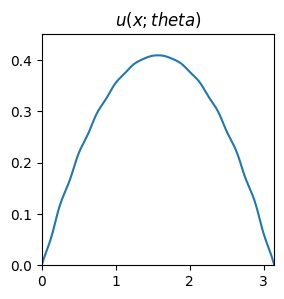

k= 21


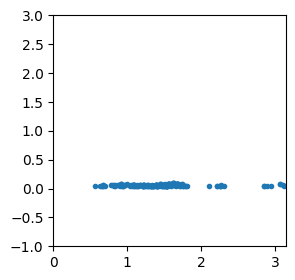

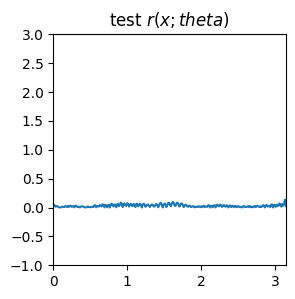

Test residual MSE: 0.00140
1000 tensor(0.0023, grad_fn=<AddBackward0>)
2000 tensor(0.0023, grad_fn=<AddBackward0>)
3000 tensor(0.0022, grad_fn=<AddBackward0>)
4000 tensor(0.0022, grad_fn=<AddBackward0>)
5000 tensor(0.0022, grad_fn=<AddBackward0>)
6000 tensor(0.0021, grad_fn=<AddBackward0>)
7000 tensor(0.0021, grad_fn=<AddBackward0>)
8000 tensor(0.0021, grad_fn=<AddBackward0>)
9000 tensor(0.0021, grad_fn=<AddBackward0>)
10000 tensor(0.0020, grad_fn=<AddBackward0>)
11000 tensor(0.0020, grad_fn=<AddBackward0>)
12000 tensor(0.0024, grad_fn=<AddBackward0>)
13000 tensor(0.0020, grad_fn=<AddBackward0>)
14000 tensor(0.0019, grad_fn=<AddBackward0>)
15000 tensor(0.0024, grad_fn=<AddBackward0>)
16000 tensor(0.0018, grad_fn=<AddBackward0>)
17000 tensor(0.0018, grad_fn=<AddBackward0>)
18000 tensor(0.0018, grad_fn=<AddBackward0>)
19000 tensor(0.0017, grad_fn=<AddBackward0>)
20000 tensor(0.0032, grad_fn=<AddBackward0>)


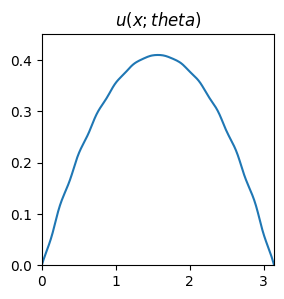

k= 22


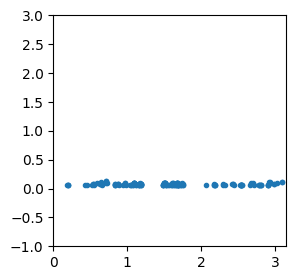

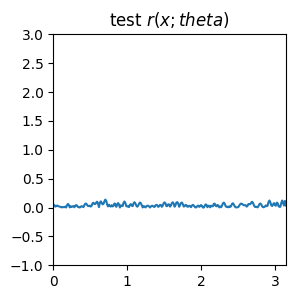

Test residual MSE: 0.00239
1000 tensor(0.0017, grad_fn=<AddBackward0>)
2000 tensor(0.0021, grad_fn=<AddBackward0>)
3000 tensor(0.0017, grad_fn=<AddBackward0>)
4000 tensor(0.0016, grad_fn=<AddBackward0>)
5000 tensor(0.0016, grad_fn=<AddBackward0>)
6000 tensor(0.0021, grad_fn=<AddBackward0>)
7000 tensor(0.0016, grad_fn=<AddBackward0>)
8000 tensor(0.0016, grad_fn=<AddBackward0>)
9000 tensor(0.0039, grad_fn=<AddBackward0>)
10000 tensor(0.0048, grad_fn=<AddBackward0>)
11000 tensor(0.0015, grad_fn=<AddBackward0>)
12000 tensor(0.0051, grad_fn=<AddBackward0>)
13000 tensor(0.0019, grad_fn=<AddBackward0>)
14000 tensor(0.0045, grad_fn=<AddBackward0>)
15000 tensor(0.0014, grad_fn=<AddBackward0>)
16000 tensor(0.0014, grad_fn=<AddBackward0>)
17000 tensor(0.0014, grad_fn=<AddBackward0>)
18000 tensor(0.0014, grad_fn=<AddBackward0>)
19000 tensor(0.0038, grad_fn=<AddBackward0>)
20000 tensor(0.0014, grad_fn=<AddBackward0>)


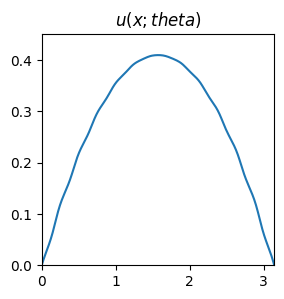

k= 23


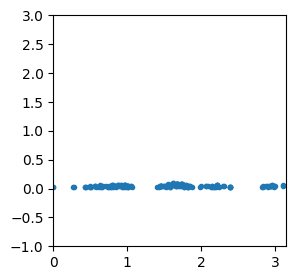

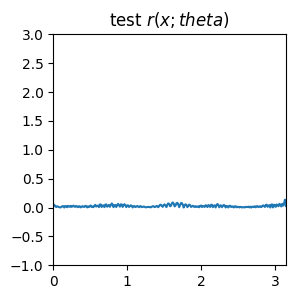

Test residual MSE: 0.00108
1000 tensor(0.0014, grad_fn=<AddBackward0>)
2000 tensor(0.0014, grad_fn=<AddBackward0>)
3000 tensor(0.0014, grad_fn=<AddBackward0>)
4000 tensor(0.0015, grad_fn=<AddBackward0>)
5000 tensor(0.0014, grad_fn=<AddBackward0>)
6000 tensor(0.0020, grad_fn=<AddBackward0>)
7000 tensor(0.0013, grad_fn=<AddBackward0>)
8000 tensor(0.0019, grad_fn=<AddBackward0>)
9000 tensor(0.0086, grad_fn=<AddBackward0>)
10000 tensor(0.0013, grad_fn=<AddBackward0>)
11000 tensor(0.0041, grad_fn=<AddBackward0>)
12000 tensor(0.0013, grad_fn=<AddBackward0>)
13000 tensor(0.0018, grad_fn=<AddBackward0>)
14000 tensor(0.0013, grad_fn=<AddBackward0>)
15000 tensor(0.0013, grad_fn=<AddBackward0>)
16000 tensor(0.0012, grad_fn=<AddBackward0>)
17000 tensor(0.0013, grad_fn=<AddBackward0>)
18000 tensor(0.0012, grad_fn=<AddBackward0>)
19000 tensor(0.0012, grad_fn=<AddBackward0>)
20000 tensor(0.0015, grad_fn=<AddBackward0>)


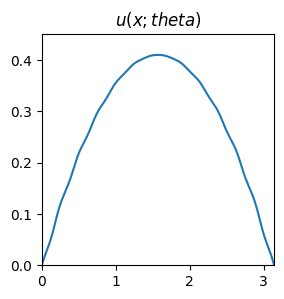

k= 24


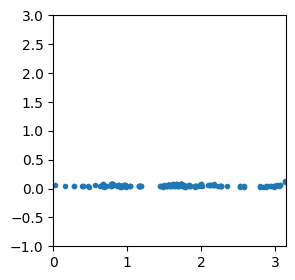

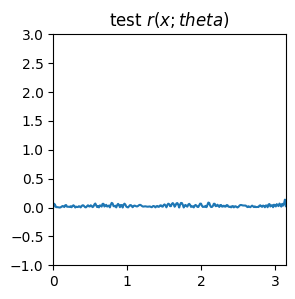

Test residual MSE: 0.00128
1000 tensor(0.0012, grad_fn=<AddBackward0>)
2000 tensor(0.0012, grad_fn=<AddBackward0>)
3000 tensor(0.0012, grad_fn=<AddBackward0>)
4000 tensor(0.0013, grad_fn=<AddBackward0>)
5000 tensor(0.0012, grad_fn=<AddBackward0>)
6000 tensor(0.0012, grad_fn=<AddBackward0>)
7000 tensor(0.0012, grad_fn=<AddBackward0>)
8000 tensor(0.0013, grad_fn=<AddBackward0>)
9000 tensor(0.0012, grad_fn=<AddBackward0>)
10000 tensor(0.0012, grad_fn=<AddBackward0>)
11000 tensor(0.0012, grad_fn=<AddBackward0>)
12000 tensor(0.0012, grad_fn=<AddBackward0>)
13000 tensor(0.0013, grad_fn=<AddBackward0>)
14000 tensor(0.0019, grad_fn=<AddBackward0>)
15000 tensor(0.0012, grad_fn=<AddBackward0>)
16000 tensor(0.0012, grad_fn=<AddBackward0>)
17000 tensor(0.0012, grad_fn=<AddBackward0>)
18000 tensor(0.0012, grad_fn=<AddBackward0>)
19000 tensor(0.0032, grad_fn=<AddBackward0>)
20000 tensor(0.0012, grad_fn=<AddBackward0>)


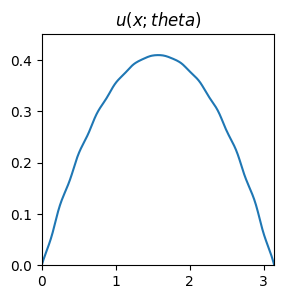

k= 25


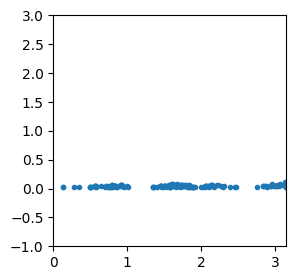

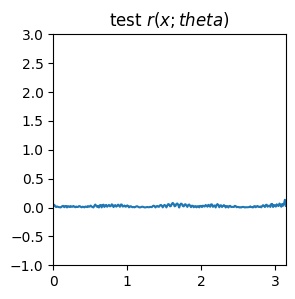

Test residual MSE: 0.00094
1000 tensor(0.0012, grad_fn=<AddBackward0>)
2000 tensor(0.0012, grad_fn=<AddBackward0>)
3000 tensor(0.0022, grad_fn=<AddBackward0>)
4000 tensor(0.0012, grad_fn=<AddBackward0>)
5000 tensor(0.0013, grad_fn=<AddBackward0>)
6000 tensor(0.0059, grad_fn=<AddBackward0>)
7000 tensor(0.0030, grad_fn=<AddBackward0>)
8000 tensor(0.0011, grad_fn=<AddBackward0>)
9000 tensor(0.0013, grad_fn=<AddBackward0>)
10000 tensor(0.0011, grad_fn=<AddBackward0>)
11000 tensor(0.0011, grad_fn=<AddBackward0>)
12000 tensor(0.0011, grad_fn=<AddBackward0>)
13000 tensor(0.0012, grad_fn=<AddBackward0>)
14000 tensor(0.0012, grad_fn=<AddBackward0>)
15000 tensor(0.0016, grad_fn=<AddBackward0>)
16000 tensor(0.0011, grad_fn=<AddBackward0>)
17000 tensor(0.0016, grad_fn=<AddBackward0>)
18000 tensor(0.0011, grad_fn=<AddBackward0>)
19000 tensor(0.0014, grad_fn=<AddBackward0>)
20000 tensor(0.0011, grad_fn=<AddBackward0>)


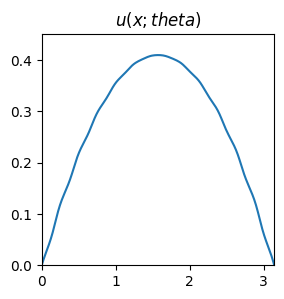

k= 26


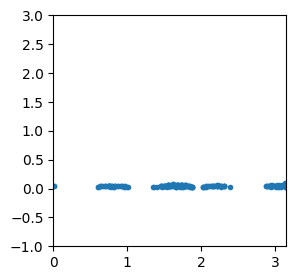

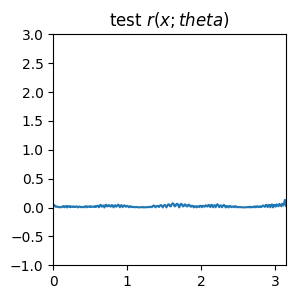

Test residual MSE: 0.00084
1000 tensor(0.0011, grad_fn=<AddBackward0>)
2000 tensor(0.0011, grad_fn=<AddBackward0>)
3000 tensor(0.0011, grad_fn=<AddBackward0>)
4000 tensor(0.0021, grad_fn=<AddBackward0>)
5000 tensor(0.0011, grad_fn=<AddBackward0>)
6000 tensor(0.0021, grad_fn=<AddBackward0>)
7000 tensor(0.0041, grad_fn=<AddBackward0>)
8000 tensor(0.0011, grad_fn=<AddBackward0>)
9000 tensor(0.0019, grad_fn=<AddBackward0>)
10000 tensor(0.0011, grad_fn=<AddBackward0>)
11000 tensor(0.0011, grad_fn=<AddBackward0>)
12000 tensor(0.0011, grad_fn=<AddBackward0>)
13000 tensor(0.0013, grad_fn=<AddBackward0>)
14000 tensor(0.0013, grad_fn=<AddBackward0>)
15000 tensor(0.0010, grad_fn=<AddBackward0>)
16000 tensor(0.0011, grad_fn=<AddBackward0>)
17000 tensor(0.0012, grad_fn=<AddBackward0>)
18000 tensor(0.0012, grad_fn=<AddBackward0>)
19000 tensor(0.0010, grad_fn=<AddBackward0>)
20000 tensor(0.0010, grad_fn=<AddBackward0>)


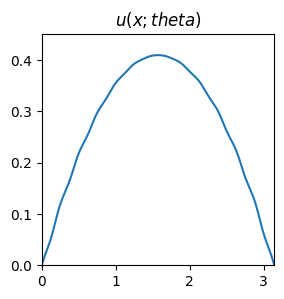

k= 27


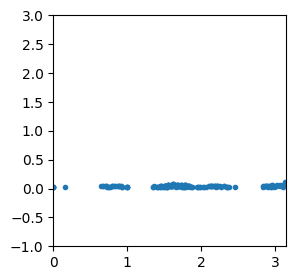

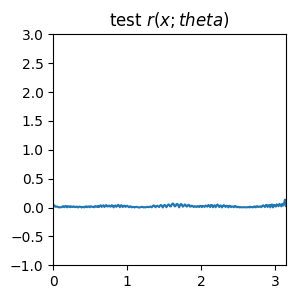

Test residual MSE: 0.00078
1000 tensor(0.0010, grad_fn=<AddBackward0>)
2000 tensor(0.0010, grad_fn=<AddBackward0>)
3000 tensor(0.0010, grad_fn=<AddBackward0>)
4000 tensor(0.0010, grad_fn=<AddBackward0>)
5000 tensor(0.0010, grad_fn=<AddBackward0>)
6000 tensor(0.0023, grad_fn=<AddBackward0>)
7000 tensor(0.0010, grad_fn=<AddBackward0>)
8000 tensor(0.0022, grad_fn=<AddBackward0>)
9000 tensor(0.0013, grad_fn=<AddBackward0>)
10000 tensor(0.0010, grad_fn=<AddBackward0>)
11000 tensor(0.0010, grad_fn=<AddBackward0>)
12000 tensor(0.0012, grad_fn=<AddBackward0>)
13000 tensor(0.0010, grad_fn=<AddBackward0>)
14000 tensor(0.0010, grad_fn=<AddBackward0>)
15000 tensor(0.0010, grad_fn=<AddBackward0>)
16000 tensor(0.0010, grad_fn=<AddBackward0>)
17000 tensor(0.0011, grad_fn=<AddBackward0>)
18000 tensor(0.0020, grad_fn=<AddBackward0>)
19000 tensor(0.0029, grad_fn=<AddBackward0>)
20000 tensor(0.0012, grad_fn=<AddBackward0>)


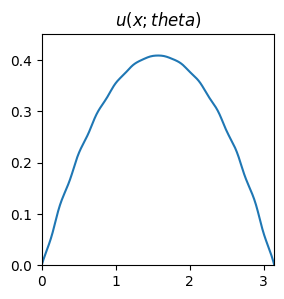

k= 28


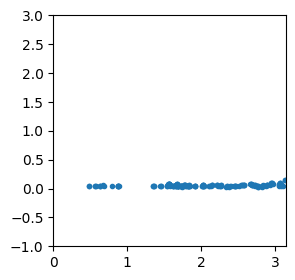

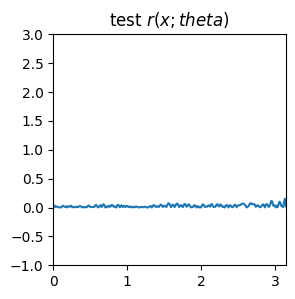

Test residual MSE: 0.00123
1000 tensor(0.0010, grad_fn=<AddBackward0>)
2000 tensor(0.0011, grad_fn=<AddBackward0>)
3000 tensor(0.0010, grad_fn=<AddBackward0>)
4000 tensor(0.0020, grad_fn=<AddBackward0>)
5000 tensor(0.0019, grad_fn=<AddBackward0>)
6000 tensor(0.0010, grad_fn=<AddBackward0>)
7000 tensor(0.0009, grad_fn=<AddBackward0>)
8000 tensor(0.0010, grad_fn=<AddBackward0>)
9000 tensor(0.0009, grad_fn=<AddBackward0>)
10000 tensor(0.0009, grad_fn=<AddBackward0>)
11000 tensor(0.0012, grad_fn=<AddBackward0>)
12000 tensor(0.0010, grad_fn=<AddBackward0>)
13000 tensor(0.0009, grad_fn=<AddBackward0>)
14000 tensor(0.0010, grad_fn=<AddBackward0>)
15000 tensor(0.0009, grad_fn=<AddBackward0>)
16000 tensor(0.0011, grad_fn=<AddBackward0>)
17000 tensor(0.0009, grad_fn=<AddBackward0>)
18000 tensor(0.0009, grad_fn=<AddBackward0>)
19000 tensor(0.0020, grad_fn=<AddBackward0>)
20000 tensor(0.0010, grad_fn=<AddBackward0>)


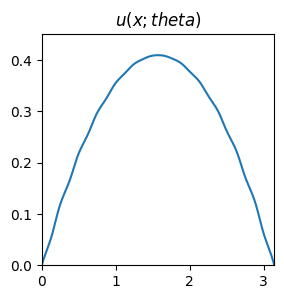

k= 29


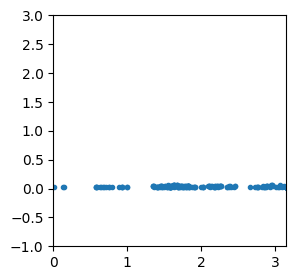

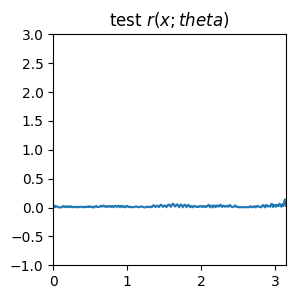

Test residual MSE: 0.00070
1000 tensor(0.0009, grad_fn=<AddBackward0>)
2000 tensor(0.0010, grad_fn=<AddBackward0>)
3000 tensor(0.0011, grad_fn=<AddBackward0>)
4000 tensor(0.0012, grad_fn=<AddBackward0>)
5000 tensor(0.0026, grad_fn=<AddBackward0>)
6000 tensor(0.0015, grad_fn=<AddBackward0>)
7000 tensor(0.0039, grad_fn=<AddBackward0>)
8000 tensor(0.0019, grad_fn=<AddBackward0>)
9000 tensor(0.0016, grad_fn=<AddBackward0>)
10000 tensor(0.0009, grad_fn=<AddBackward0>)
11000 tensor(0.0009, grad_fn=<AddBackward0>)
12000 tensor(0.0009, grad_fn=<AddBackward0>)
13000 tensor(0.0008, grad_fn=<AddBackward0>)
14000 tensor(0.0009, grad_fn=<AddBackward0>)
15000 tensor(0.0009, grad_fn=<AddBackward0>)
16000 tensor(0.0019, grad_fn=<AddBackward0>)
17000 tensor(0.0046, grad_fn=<AddBackward0>)
18000 tensor(0.0009, grad_fn=<AddBackward0>)
19000 tensor(0.0008, grad_fn=<AddBackward0>)
20000 tensor(0.0013, grad_fn=<AddBackward0>)


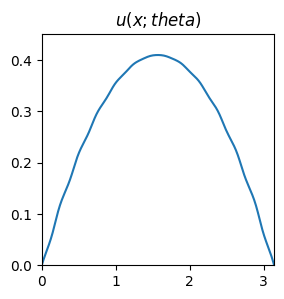

In [4]:
x_adv = np.array([]).reshape((0,1))
''' k=1:30 '''
for i in range(30):
    print("k=", i)
    x_train = np.vstack([x_train, x_adv])
    x_adv = generate_attack_samples(PINN, device, x_train, N0)
    retrain(PINN, x_train, x_adv, x_boundary, u_boundary, x_test, epoch=2e4)

k= 30


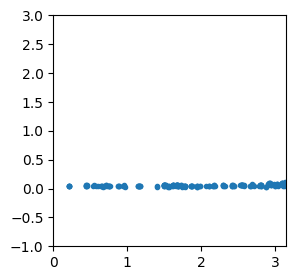

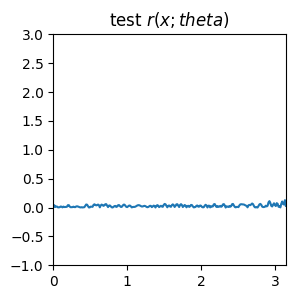

Test residual MSE: 0.00121
1000 tensor(0.0008, grad_fn=<AddBackward0>)
2000 tensor(0.0012, grad_fn=<AddBackward0>)
3000 tensor(0.0009, grad_fn=<AddBackward0>)
4000 tensor(0.0008, grad_fn=<AddBackward0>)
5000 tensor(0.0026, grad_fn=<AddBackward0>)
6000 tensor(0.0015, grad_fn=<AddBackward0>)
7000 tensor(0.0028, grad_fn=<AddBackward0>)
8000 tensor(0.0008, grad_fn=<AddBackward0>)
9000 tensor(0.0010, grad_fn=<AddBackward0>)
10000 tensor(0.0042, grad_fn=<AddBackward0>)
11000 tensor(0.0008, grad_fn=<AddBackward0>)
12000 tensor(0.0008, grad_fn=<AddBackward0>)
13000 tensor(0.0009, grad_fn=<AddBackward0>)
14000 tensor(0.0008, grad_fn=<AddBackward0>)
15000 tensor(0.0008, grad_fn=<AddBackward0>)
16000 tensor(0.0035, grad_fn=<AddBackward0>)
17000 tensor(0.0031, grad_fn=<AddBackward0>)
18000 tensor(0.0008, grad_fn=<AddBackward0>)
19000 tensor(0.0008, grad_fn=<AddBackward0>)
20000 tensor(0.0007, grad_fn=<AddBackward0>)


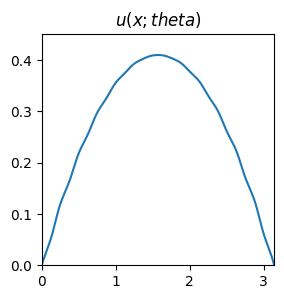

k= 31


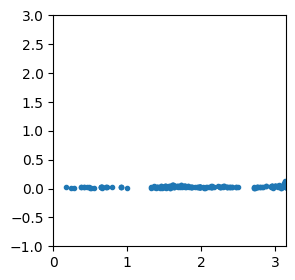

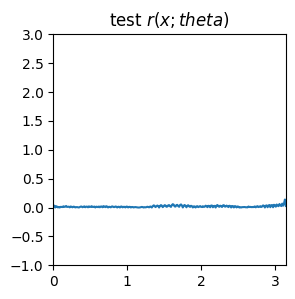

Test residual MSE: 0.00057
1000 tensor(0.0010, grad_fn=<AddBackward0>)
2000 tensor(0.0008, grad_fn=<AddBackward0>)
3000 tensor(0.0007, grad_fn=<AddBackward0>)
4000 tensor(0.0013, grad_fn=<AddBackward0>)
5000 tensor(0.0007, grad_fn=<AddBackward0>)
6000 tensor(0.0007, grad_fn=<AddBackward0>)
7000 tensor(0.0007, grad_fn=<AddBackward0>)
8000 tensor(0.0007, grad_fn=<AddBackward0>)
9000 tensor(0.0007, grad_fn=<AddBackward0>)
10000 tensor(0.0007, grad_fn=<AddBackward0>)
11000 tensor(0.0007, grad_fn=<AddBackward0>)
12000 tensor(0.0007, grad_fn=<AddBackward0>)
13000 tensor(0.0007, grad_fn=<AddBackward0>)
14000 tensor(0.0007, grad_fn=<AddBackward0>)
15000 tensor(0.0008, grad_fn=<AddBackward0>)
16000 tensor(0.0007, grad_fn=<AddBackward0>)
17000 tensor(0.0007, grad_fn=<AddBackward0>)
18000 tensor(0.0007, grad_fn=<AddBackward0>)
19000 tensor(0.0008, grad_fn=<AddBackward0>)
20000 tensor(0.0007, grad_fn=<AddBackward0>)


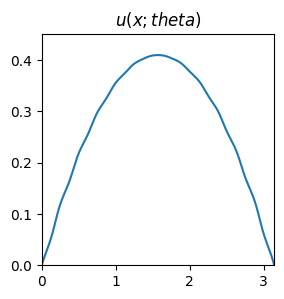

k= 32


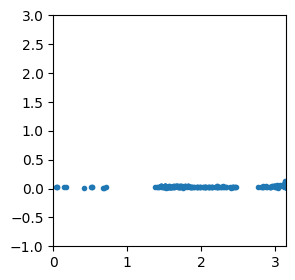

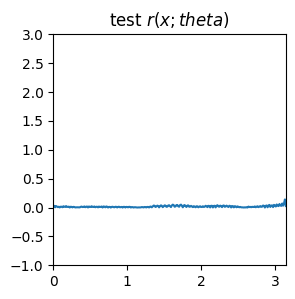

Test residual MSE: 0.00052
1000 tensor(0.0007, grad_fn=<AddBackward0>)
2000 tensor(0.0011, grad_fn=<AddBackward0>)
3000 tensor(0.0010, grad_fn=<AddBackward0>)
4000 tensor(0.0007, grad_fn=<AddBackward0>)
5000 tensor(0.0007, grad_fn=<AddBackward0>)
6000 tensor(0.0007, grad_fn=<AddBackward0>)
7000 tensor(0.0007, grad_fn=<AddBackward0>)
8000 tensor(0.0006, grad_fn=<AddBackward0>)


In [ ]:
for i in range(5):
    print("k=", i+30)
    x_train = np.vstack([x_train, x_adv])
    x_adv = generate_attack_samples(PINN, device, x_train, N0)
    retrain(PINN, x_train, x_adv, x_boundary, u_boundary, x_test, epoch=2e4)